### 3. Test a hypothesis and construct a confidence interval for the difference in means of two populations.


In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Hypothesis

State the problem : Is there any difference in the average meal price between Downtown and Rural locations

Null Hypothesis ($H_0$): There is no difference in the average meal price between Downtown and Rural locations.

$$
H_0: \mu_1 = \mu_2
$$

Alternative Hypothesis ($H_1$): There is a difference in the average meal price between Downtown and Rural locations.

$$
H_1: \mu_1 \neq \mu_2
$$


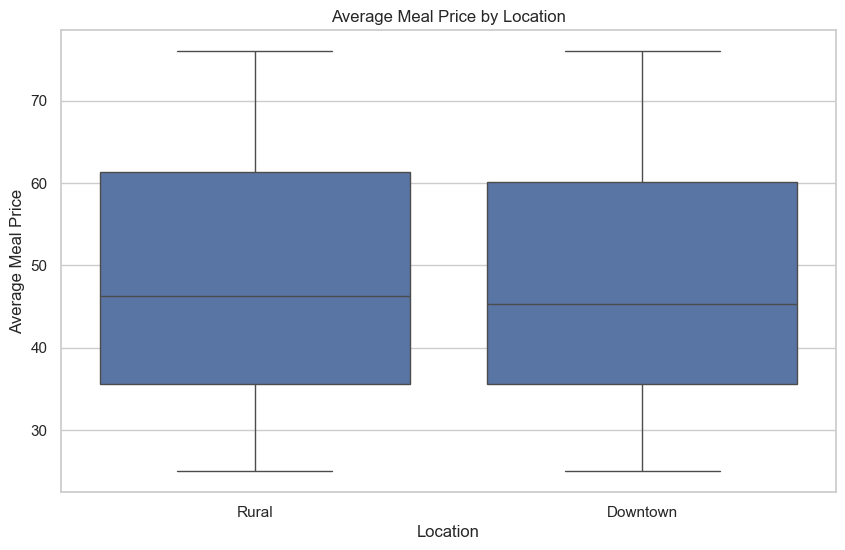

In [2]:
# Load your data
data = pd.read_csv('restaurant_data.csv')

# Set the style of the visualization
sns.set(style="whitegrid")

# Filter data to include only Downtown and Rural locations
filtered_data = data[data['Location'].isin(['Downtown', 'Rural'])]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Average Meal Price', data=filtered_data)
plt.title('Average Meal Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Meal Price')
plt.show()

In [3]:
# Calculate the average meal prices for Downtown and Rural locations
average_prices = data.groupby('Location')['Average Meal Price'].mean().loc[['Downtown', 'Rural']]
print(average_prices)

Location
Downtown    47.688898
Rural       48.637013
Name: Average Meal Price, dtype: float64


Caculate the t-statistic and the p-value

In [4]:
# Separate the data into two groups based on the location
downtown_prices = data[data['Location'] == 'Downtown']['Average Meal Price']
rural_prices = data[data['Location'] == 'Rural']['Average Meal Price']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(downtown_prices, rural_prices, equal_var=False)

print (f'The t-statistic is {t_stat} and the p-value is {p_value}')


The t-statistic is -2.4647920805760273 and the p-value is 0.013739213054987185


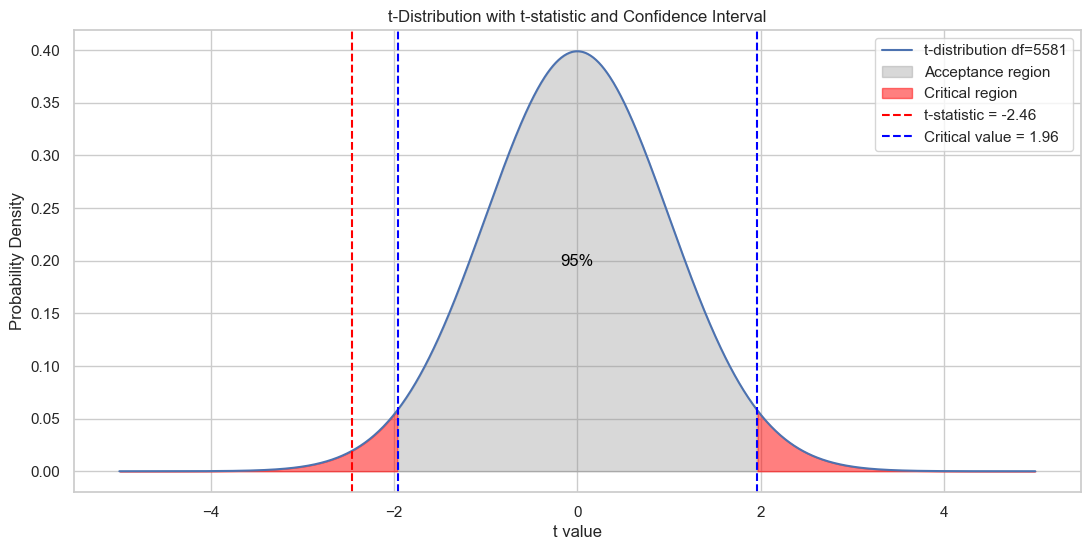

In [5]:

df = len(downtown_prices) + len(rural_prices) - 2  # degrees of freedom
alpha = 0.05  # significance level for a 95% confidence interval

# Create an array of x values for the t-distribution
x = np.linspace(-5, 5, 1000)

# Calculate the t-distribution for the given degrees of freedom
y = stats.t.pdf(x, df)

# Critical t-value for a two-tailed test at 95% confidence level
critical_value = stats.t.ppf(1 - alpha/2, df)

# Plot the t-distribution
plt.figure(figsize=(13, 6))
plt.plot(x, y, label='t-distribution df={}'.format(df))

# Fill the acceptance region (within the critical values)
plt.fill_between(x, y, where=(x <= critical_value) & (x >= -critical_value), color='grey', alpha=0.3, label='Acceptance region')

# Add text for the 95% acceptance region
plt.text(0 * critical_value, max(y)/2, '95%', fontsize=12, verticalalignment='center', horizontalalignment='center', color='black')

plt.fill_between(x, y, where=(x <= -critical_value), color='red', alpha=0.5, )
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5 , label='Critical region')
plt.axvline(x=t_stat, color='red', linestyle='--', label='t-statistic = {:.2f}'.format(t_stat))
#plt.axvline(x=-t_stat, color='red', linestyle='--')

# Add critical value lines
plt.axvline(x=critical_value, color='blue', linestyle='--', label='Critical value = {:.2f}'.format(critical_value))
plt.axvline(x=-critical_value, color='blue', linestyle='--',)

plt.title('t-Distribution with t-statistic and Confidence Interval')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Because t t-statistic is -2.464 not in the acceptance region of 95% confidence interval which is the critical value of -1.96 to 1.96 so reject H0

Construct a confidence interval for the difference
in means of two populations.

In [8]:
# Calculate means
mean_downtown = downtown_prices.mean()
mean_rural = rural_prices.mean()

# Calculate standard deviations
std_downtown = downtown_prices.std(ddof=1)
std_rural = rural_prices.std(ddof=1)

# Calculate sample sizes
n_downtown = downtown_prices.count()
n_rural = rural_prices.count()

# Calculate the mean difference
mean_difference = mean_downtown - mean_rural

# Calculate the standard error
SE = np.sqrt((std_downtown ** 2 / n_downtown) + (std_rural ** 2 / n_rural))

# Calculate the degrees of freedom
df = ((std_downtown ** 2 / n_downtown) + (std_rural ** 2 / n_rural)) ** 2 / \
     (((std_downtown ** 2 / n_downtown) ** 2 / (n_downtown - 1)) + ((std_rural ** 2 / n_rural) ** 2 / (n_rural - 1)))

# Determine the critical t value (two-tailed) for 95% confidence
critical_value = stats.t.ppf(1 - 0.025, df)

# Calculate the margin of error
margin_of_error = critical_value * SE

# Calculate the confidence interval
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)

print('The confidence interval is:', confidence_interval)

The confidence interval is: (-1.7022057737396858, -0.19402518620923725)


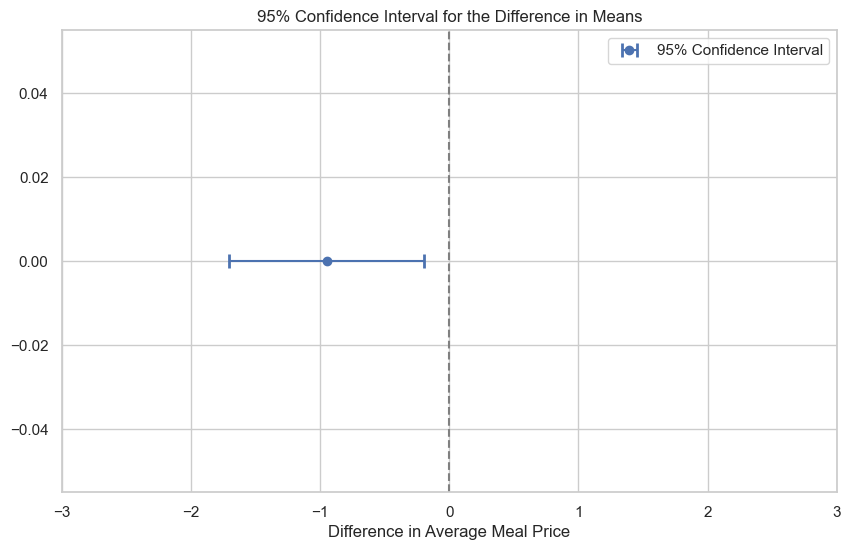

In [9]:
# Plot the confidence interval in a horizontal format with a more zoomed-out view
plt.figure(figsize=(10, 6))
plt.errorbar(y=0, x=mean_difference, xerr=[[mean_difference - confidence_interval[0]], [confidence_interval[1] - mean_difference]],
             fmt='o', color='b', capsize=5, capthick=2, label='95% Confidence Interval')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Difference in Average Meal Price')
plt.title('95% Confidence Interval for the Difference in Means')
plt.legend()
plt.grid(True)
plt.xlim(-3, 3)  # Adjust the x-limits to zoom out
plt.show()